In [22]:
#import numpy and pandas
#import visualization libraries and set %matplotlib inline
#read in the csv file as a dataframe called df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
urgence = pd.read_csv('911.csv', sep = ',' )

In [5]:
#check the info() of the df
urgence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
#check the head of df
urgence.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [13]:
# what are the top 5 for 911 calls?
urgence['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [14]:
# what are the top 5 townships (twp) for 911 calls?
urgence['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [15]:
# how many unique title codes are there?
urgence['title'].nunique()

110

In [26]:
#use apply() with a custom lambda expression to create a new column
urgence['Reason'] = urgence['title'].apply(lambda title: title.split(':')[0])

In [20]:
#what is the most common Reason for a 911 call based off of this new column?
urgence['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

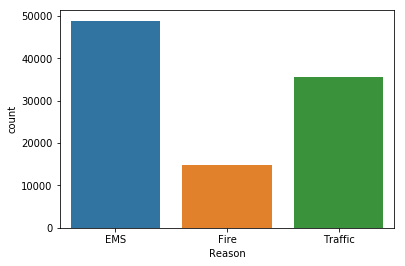

In [28]:
#now use seaborn to create a countplot of 911 calls by Reason
sns.countplot(x='Reason',data=urgence)

In [29]:
#what is the data type of the objects in the timeStamp column?
type(urgence['Reason'].iloc[0])

str

In [30]:
#use pd.to_datetime to convert the column from strings to DateTime objects
urgence['timeStamp'] = pd.to_datetime(urgence['timeStamp'])

In [31]:
#create 3 new columns called hour,month and day of week
urgence['Hour'] = urgence['timeStamp'].apply(lambda time: time.hour)
urgence['Month'] = urgence['timeStamp'].apply(lambda time: time.month)
urgence['Day of Week'] = urgence['timeStamp'].apply(lambda time: time.dayofweek)

In [32]:
#use .map() with this dictionary to map actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
urgence['Day of Week'] = urgence['Day of Week'].map(dmap)

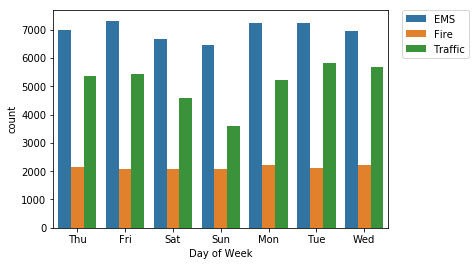

In [37]:
#use seaborn to create a countplot of the day of week column with the hue based off of the reason column
sns.countplot(x='Day of Week',data=urgence,hue='Reason')
plt.legend(bbox_to_anchor=(1.04, 1), loc=2, borderaxespad=0.)



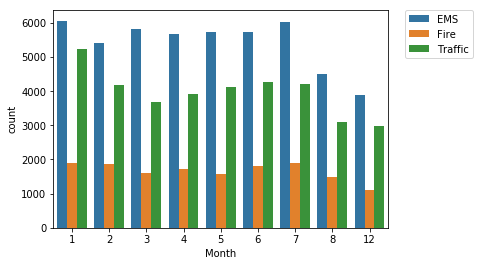

In [38]:
# now do the same for month
sns.countplot(x='Month',data=urgence,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
#some months are not here. It's look like 9,10 and 11 are abscent.

In [40]:
#now ceate a groupby object called bymonth, where you group the dataframe by the month column and use the count() method for aggregation. 
#Use the head() method on this returned dataframe
byMonth = urgence.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


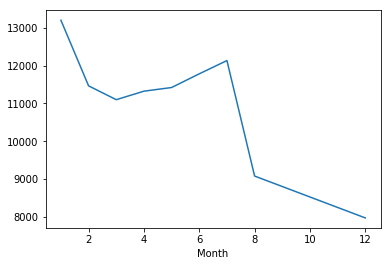

In [41]:
#now create a simple plot off of the dataframe indicating the count of calls per month
byMonth['Reason'].plot()

C:\Users\littlejack\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


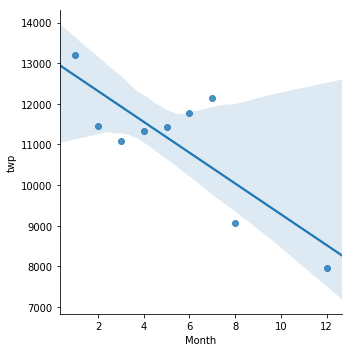

In [42]:
#now see if you can use seaborn's implot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column
byMonth = byMonth.reset_index()
sns.lmplot(x='Month',y='twp',data=byMonth)

In [43]:
#create a new column called 'date' that contains the date from the timestamp column. You'll need to use apply along with .date() method. 
urgence['Date']=urgence['timeStamp'].apply(lambda t: t.date())

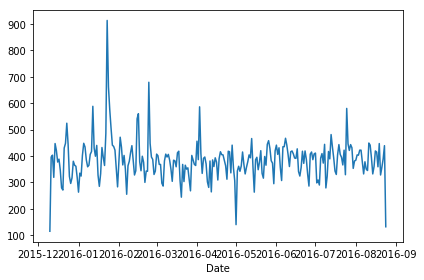

In [44]:
#now groupby this date column with count() aggregate and create a plot of counts of 911 calls. 
urgence.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

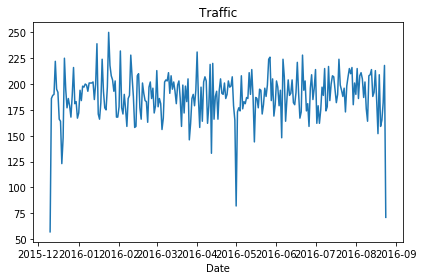

In [45]:
#now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.
urgence[urgence['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

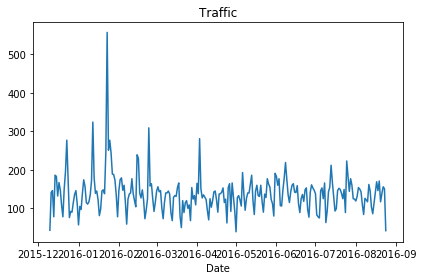

In [46]:
urgence[urgence['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

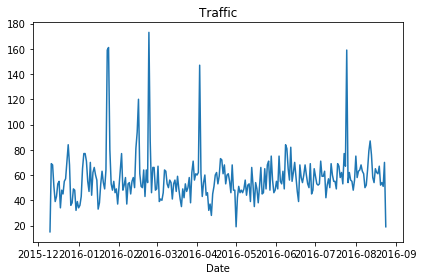

In [47]:
urgence[urgence['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

In [48]:
dayHour = urgence.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


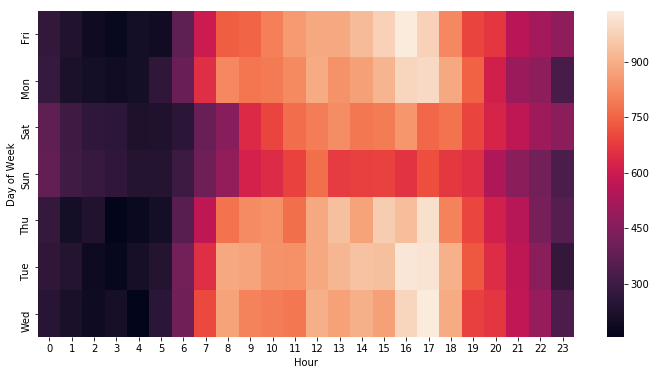

In [49]:
#now create a heatmap using this new dataframe
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

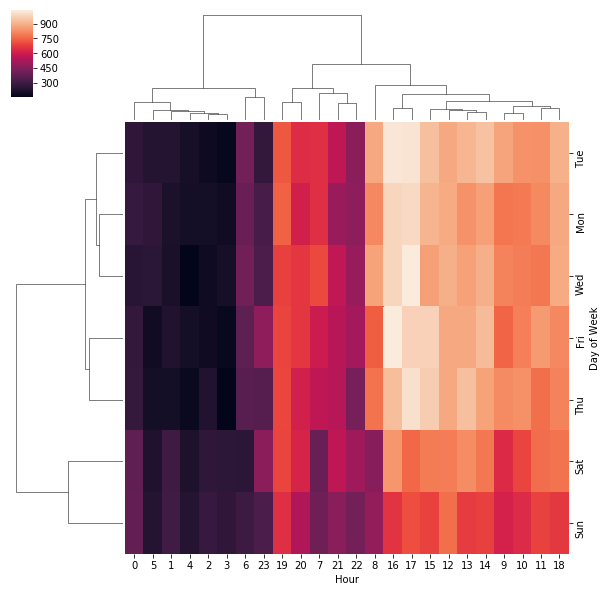

In [50]:
#now create a clustermap using this dataframe
sns.clustermap(dayHour)

In [53]:
#repeat these same plots and operations.Shows the month as the column
Month = urgence.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
Month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


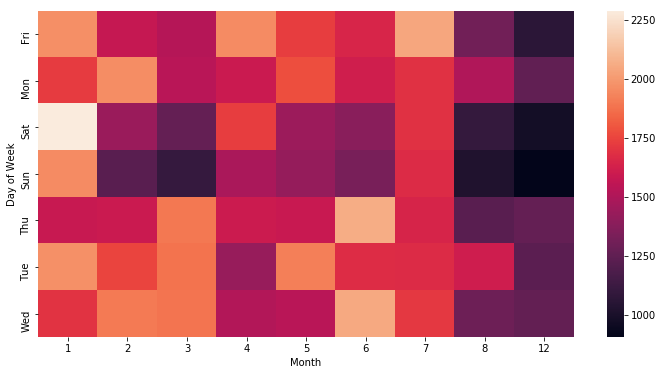

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(Month)

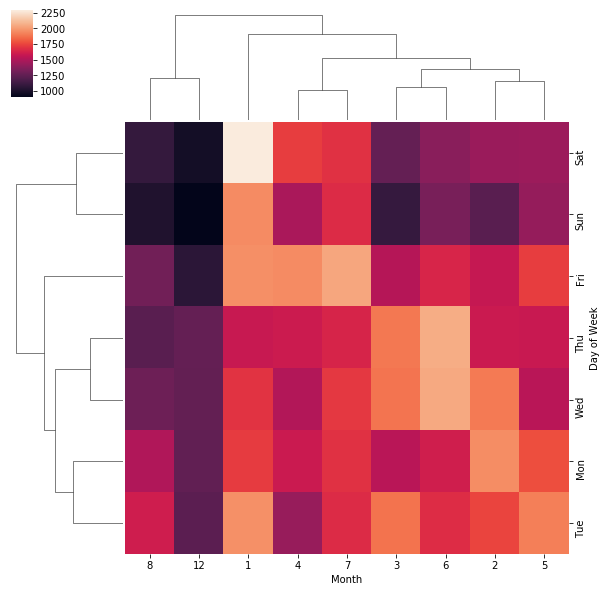

In [55]:
sns.clustermap(Month)